In [3]:
import numpy as np
import pandas as pd

In [4]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\Samruddhi Garge\AppData\Local\Temp\ipykernel_23384\3819754567.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [5]:
users.head(7)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
duplicate_books = books.duplicated(subset=['ISBN']).sum()
print(f"\nNumber of Duplicate Books: {duplicate_books}")


Number of Duplicate Books: 0


In [13]:
book_rating_counts = books.groupby('Book-Title').size().sort_values(ascending=False).head(10)


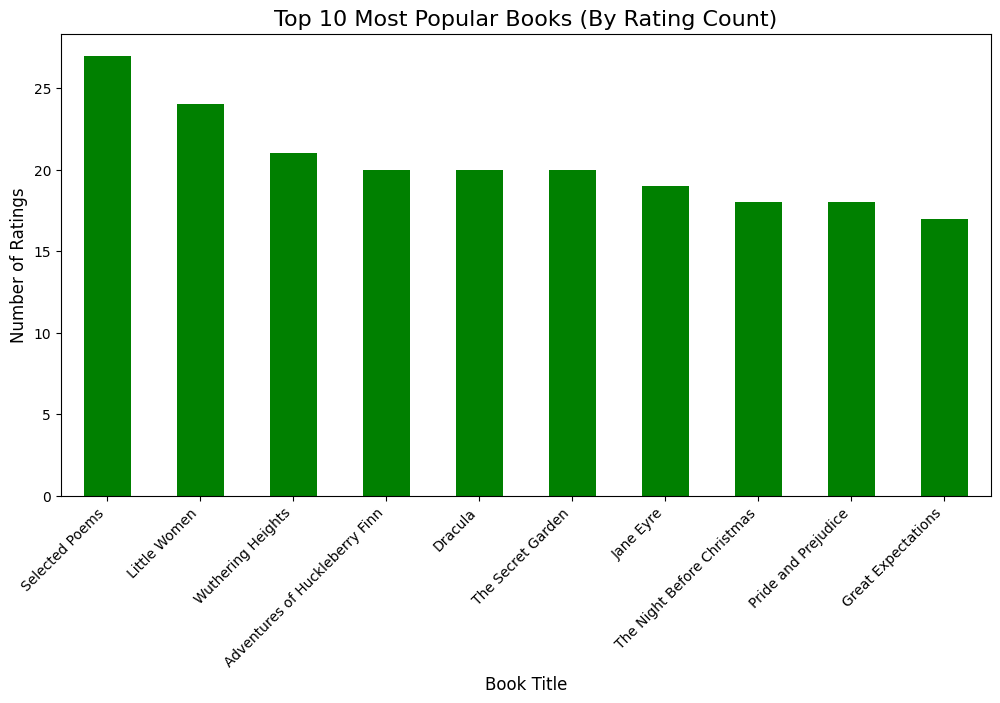

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
book_rating_counts.plot(kind='bar', color='green')
plt.title('Top 10 Most Popular Books (By Rating Count)', fontsize=16)
plt.xlabel('Book Title', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [18]:
author_counts = books['Book-Author'].value_counts().head(10)

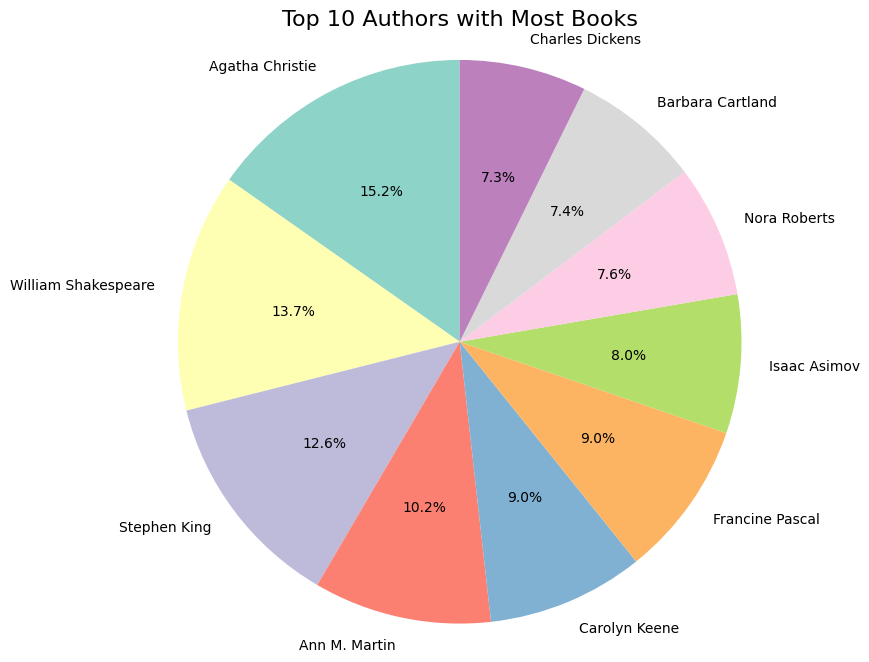

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(author_counts)))
plt.title('Top 10 Authors with Most Books', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()